---
layout: post
title: python 高斯混合模型
category: dsp
tags: [dsp, ai, python]
---

## 高斯混合模型


高斯混合模型（Gaussian Mixed Model）是使用多个（多元）高斯分布函数实现数据分类对目的。
在介绍高斯混合模型之前，我们需要了解以下几个概念：

* 一元高斯分布函数
* 协方差矩阵
* 多元高斯分布函数

## 一元高斯分布

高斯分布也叫正态分布，是一种非常常见对连续概率分布。
若随机变量 X 服从参数 $\mu$ 和 $\delta$ 的正态分布，记为：

$$
X \sim N(\mu, \delta^2)
$$

其中参数 $\mu$ 是其数学期望，$\delta$ 表示标准差，$\delta^2$ 是方差。

其概率密度函数为：

$$
N(x; \mu, \delta)  = \frac{1}{\delta \sqrt{2\pi}} e^{- \frac{(x - \mu)^2}{2 \delta^2}}
$$

下面给出 $\delta$ 分别为 0.2, 0.5 和 1 时的概率密度图。

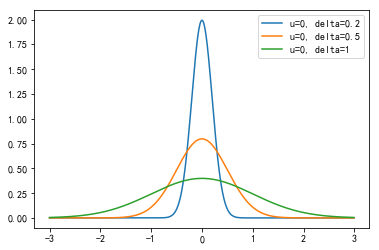

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, delta):
    exp = np.exp(- np.power(x - mu, 2) / (2 * np.power(delta, 2)))
    c = 1 / (delta * np.sqrt(2 * np.pi))
    return c * exp
    

x = np.arange(-3,3,0.01)
for delta in [0.2, 0.5, 1]:
    y = gaussian(x, 0, delta)
    plt.plot(x, y, label='u=0, delta={}'.format(delta))

plt.legend()
plt.show()

正态分布性质：

* 概率密度函数关于 $\mu$ 对称
* 函数曲线下平均数左右一个标准差范围内的面积为 68.268949%
* 函数曲线下平均数左右两个标准差范围内的面积为 95.449974%
* 函数曲线下平均数左右三个标准差范围内的面积为 99.730020%
* 如果 $\displaystyle X \sim N(\mu ,\sigma ^{2})$ 且 a 和 b 是实数，则 $\displaystyle aX + b \sim N(a \mu + b, (a \delta)^2)$
* 如果 $\displaystyle X \sim N(\mu_X ,\sigma_X ^{2})$ 与 $\displaystyle Y \sim N(\mu_Y ,\sigma_Y ^{2})$ 是统计独立的常态随机变量，那么 $\displaystyle X + Y \sim N(\mu_X + \mu_Y ,\sigma_X ^{2} + \sigma_Y ^{2})$

## 协方差矩阵

方差（Variance）是用来度量随机变量与其数学期望之间的偏离程度，记为：

$$
\delta^2 = \frac{\sum (X - E(X))^2}{N}
$$

协方差（Covariance）是用来衡量两个随机变量的总体误差。方差是协方差的一种特殊情况，即两个变量相同时协方差等于方差。

$$
\begin{align}
Cov(X, Y) & = \frac{\sum (X - E(X))(Y - E(Y))}{N} \\
          & = E((X - E(X))(Y - E(Y)) \\
          & = E(X \cdot Y) - E(X)E(Y) \\
\end{align}
$$

协方差用来表征两个变量的总体误差程度，有如下特性：

* 当两个变量变化趋势一致时，协方差的值大于零（一个变量大于其期望时，另一个变量也大于其期望）
* 当两个变量变化趋势相反时，协方差的值小于零（一个变量大于其期望时，另一个变量小于其期望）
* 当两个变量是独立统计变量时，协方差当值等于0（ 即 $E(X \cdot Y) = E(X)E(Y)$ ）

由于协方差当值跟变量的取值范围关联性比较大，所以把协方差值除以两个变量的标准差来归一化协方差，记为:

$$
\eta = \frac{Cov(X, Y)}{\delta_x \delta_y}
$$

$\eta$ 表示两个变量的线性相关程度，取值范围 [-1,1]

当随机变量X和随机变量Y都是向量时，则由随机变量X和随机变量Y的协方差构成二维协方差矩阵，其第（i,j）个元素表示 $X_i$ 变量与 $Y_j$ 变量的协方差。协方差矩阵记为 $\Sigma$，每个元素定义为:

$$
\Sigma_{ij} = Cov(X_i, Y_i)
$$

假设 X 是由 n 个随机变量组成的列向量:

$$
X = \begin{bmatrix}
X_1 \\
X_2 \\
\cdot \\
\cdot \\
\cdot \\
X_n \\
\end{bmatrix}
$$

则 X 列向量和 $X^T$ 行向量构成的协方差矩阵为:

$$
\Sigma = \begin{bmatrix}
Cov(X_1, X_1) & Cov(X_1, X_2) & \cdots & Cov(X_1, X_n) \\
Cov(X_2, X_1) & Cov(X_2, X_2) & \cdots & Cov(X_2, X_n) \\
\cdot & \cdot & \cdots & \cdot \\
\cdot & \cdot & \cdots & \cdot \\
\cdot & \cdot & \cdots & \cdot \\
Cov(X_n, X_1) & Cov(X_n, X_2) & \cdots & Cov(X_n, X_n) \\
\end{bmatrix}
$$


## 多元高斯分布

上面将的是一元高斯分布，也就是说变量 X 是一维变量。如果 X 是向量的话，则演化为多元高斯分布。


多元高斯分布的概率密度函数为：

$$
p(X; \mu, \Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} exp(- \frac{1}{2} (X - \mu)\Sigma^{-1}(X - \mu))
$$

其中 n 是向量 X 的维数，$\mu$ 是向量 X 的数学期望，也是向量。 $\Sigma$ 是向量 X 和向量 $X^T$ 构成的二维协方差矩阵。

一元高斯分布是多元高斯分布的特例，即当 X 是一维时，$n = 1$ 且 $\Sigma = \delta^2, \Sigma^{-1} = \frac{1}{\delta^2}$，此时：

$$
p(X; \mu, \Sigma) = N(X; \mu, \delta^2) = \frac{1}{\delta \sqrt{2\pi}} exp({- \frac{(x - \mu)^2}{2 \delta^2}})
$$



## 高斯混合模型

上面讲的无论是一元高斯还是多元高斯都属于单个高斯分布，即单高斯分布模型（GSM, Gaussian Single Model）。

单高斯模型可以用来做二分类，但是模型能力相对较弱一些。这时就需要引入高斯混合模型（GMM, Gaussian Mixture Model)。

高斯混合模型都概率密度函数如下：

$$
p(x) = \sum_{j=1}^k \alpha_j N(x; \mu_j, \Sigma_j)
$$

其中 k 是高斯分布的个数，$\alpha_j$ 表示每个高斯分布的权重，$\mu_j$ 和 $\Sigma_j$ 分别表示每个高斯分布的数学期望和协方差。每个高斯分布的权重需满足下面以下特性：

* 所有权重之和为1，即 $\sum_{j=1}^k \alpha_j = 1 $
* 每个权重值在[0,1]之间，即 $ 0 \leq \alpha_j \leq 1$

高斯混合模型主要应用在聚类领域（无监督分类），由于其具有良好的计算能力，并结合 EM 算法，高斯混合模型在实际应用中被广泛使用。

对于聚类问题来说，每个高斯分布代表一个分类，$\alpha_j$ 表示样本属于第 j 个分类的概率，记为: 

$$
\alpha_j = P( z=j | \theta) = \frac{N_j}{N}
$$

其中 N 表示样本总量, $N_j$ 表示第 j 个分类的样本数量，$\theta$ 表示所有高斯分布参数($\mu_j, \Sigma_j$）确定情况。


## EM 算法

当样本空间（的分类）已经确定当情况下，我们很容易求出每个高斯分布的 $\alpha_j, \mu_j, \Sigma_j$，然后根据求出的参数去识别测试数据即可。

但是大部分情况下，样本的分类是不确定的，即没有被标记，属于隐变量。这样我们就不能简单的计算高斯混合模型的参数。

这是就需要用到最大期望（EM）算法，EM 算法是一种迭代算法，用于含有隐变量的概率参数模型的极大似然估计或者极大贝叶斯后验概率估计。

EM算法分为 E-Step 和 M-Step 两步, 下面以高斯混合模型为例来描述两个步骤：

* E-Step 利用现有模型参数 $\theta$ 求所有样本属于隐变量的 $z_j$ 类别的概率, 记为

$$
\gamma(i,j) = \frac{\alpha_j N(x_i, \mu_j, \Sigma_j)}{\sum_{n=0}^{k} \alpha_n N(x_i, \mu_n, \Sigma_n)}
$$

  其中 $\gamma(i,j)$ 表示第 i 个样本 $x_i$ 属于第 j 个分类的后验概率。

* M-Step 利用最大似然方法更新现有模型参数：

$$
N_j = \sum_{i=1}^N \gamma(i, j)
$$

$$
\mu_j = \frac{ \sum_{i=1}^N \gamma(i, j) x_i}{N_j}
$$

$$
\Sigma_j = \frac{ \sum_{i=1}^N \gamma(i, j) (x_i - \mu_j)(x_i - \mu_j)^T}{N_j}
$$

$$
\alpha_j = \frac{N_k}{N}
$$


## 总结

高斯混合模型使用多个高斯分布（可以是一元或者多元）来达到模拟任意概率分布模型。

高斯混合模型通过使用 EM 算法可以有效的进行聚类识别，其步骤如下：

* 随机初始化高斯混合模型的参数 $\alpha_j, \mu_j, \Sigma_j$
* E-Step 求每个样本的属于每个分类的后验概率
* M-Step 使用后验概率更新高斯混合模型的参数
* 重复上述两个步骤，直至模型趋于稳定


## 参考

* [协方差](https://zh.wikipedia.org/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE)
* [协方差的意义和计算公式](http://www.cnblogs.com/ywl925/p/3210822.html)
* [多维高斯分布是如何由一维发展而来的？](https://www.zhihu.com/question/36339816)
* [多元高斯分布（多元正态分布）简介](https://www.datalearner.com/blog/1051485590815771)
* [EM及高斯混合模型](http://www.cnblogs.com/zhangchaoyang/articles/2624882.html)
* [EM算法学习](http://www.cnblogs.com/mindpuzzle/archive/2013/04/05/2998746.html)
* [高斯混合模型 GMM](http://www.cnblogs.com/mindpuzzle/archive/2013/04/24/3036447.html)
* [最大期望算法](http://www.csuldw.com/2015/12/02/2015-12-02-EM-algorithms/)